In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [329]:
from datetime import datetime

In [330]:
df1 = pd.read_csv("TrainingData_V1.csv")
df2 = pd.read_excel("TestingData_For_Candidate.xlsx", sheet_name= "Sheet1")

In [331]:
df1["train_test_indicator"]="train"
df2["train_test_indicator"]="test"

In [332]:
for col in ['order_date','delivery_date','user_dob','user_reg_date']:
    df2[col] = df2[col].dt.strftime("%d-%m-%Y")

In [333]:
df=df1.append(df2, ignore_index = True)

In [334]:
for col in ['order_date','delivery_date','user_dob','user_reg_date']:
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True)

In [335]:
df['Delivery_days']= np.trunc((df['delivery_date'] - df['order_date'])/np.timedelta64(1,'D'))

In [336]:
df['User_Age']= np.trunc((df['order_date'] - df['user_dob'])/np.timedelta64(1,'Y'))

In [337]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,train_test_indicator,Delivery_days,User_Age
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,1013,2016-06-23,0.0,train,5.0,47.0
1,10,2016-06-22,2016-06-27,195,xxl,grey,46,19.9,30823,Mrs,1970-04-22,1001,2015-03-15,1.0,train,5.0,46.0
2,11,2016-06-22,2016-07-05,25,xxl,grey,5,79.9,30823,Mrs,1970-04-22,1001,2015-03-15,0.0,train,13.0,46.0
3,32,2016-06-23,2016-06-26,173,m,brown,20,19.9,17234,Mrs,1960-01-09,1013,2015-02-17,0.0,train,3.0,56.0
4,43,2016-06-23,2016-06-26,394,40,black,44,90.0,30827,Mrs,NaT,1006,2016-02-09,1.0,train,3.0,NaN


In [338]:
df = df.dropna(how='any', subset=['delivery_date'])

In [339]:
df=df[df['Delivery_days']>=0]

In [340]:
df_train=df[df['train_test_indicator']=="train"]
df_test=df[df['train_test_indicator']=="test"]

In [341]:
print("train",df_train.shape)
print("test",df_test.shape)

train (71663, 17)
test (17947, 17)


In [342]:
df_test=df_test[df_test['item_id'].isin(df_train['item_id'].unique())]

In [343]:
df_test.shape

(17895, 17)

In [344]:
print(min(df_train['User_Age']))
print(max(df_train['User_Age']))

4.0
115.0


In [345]:
LL=df_train['User_Age'].mean() - 3*df_train['User_Age'].std()
UL=df_train['User_Age'].mean() + 3*df_train['User_Age'].std()
print("Lowest allowed",LL)
print("Highest allowed",UL)
((df_train['User_Age'] < LL) | (df_train['User_Age'] > UL)).sum()

Lowest allowed 18.1875060404912
Highest allowed 85.58820204050225


927

In [346]:
#CAPPING
upper_limit = df_train['User_Age'].mean() + 3*df_train['User_Age'].std()
lower_limit = df_train['User_Age'].mean() - 3*df_train['User_Age'].std()

df_train['User_Age'] = np.where(df_train['User_Age']>upper_limit,upper_limit,
                 np.where(df_train['User_Age']<lower_limit,lower_limit, df_train['User_Age']))

In [347]:
print(min(df_train['User_Age']))
print(max(df_train['User_Age']))

18.1875060404912
85.58820204050225


In [23]:
# Q1 = df_train['User_Age'].quantile(0.25)
# Q3 = df_train['User_Age'].quantile(0.75)
# IQR = Q3 - Q1
# LL= Q1 - 1.5 * IQR
# UL= Q3 + 1.5 * IQR
# print("Lowest allowed",LL)
# print("Highest allowed",UL)
# ((df_train['User_Age'] < LL) | (df_train['User_Age'] > UL)).sum()
# Lowest allowed 28.5
# Highest allowed 72.5
# 1833

In [348]:
upper_limit = df_test['User_Age'].mean() + 3*df_test['User_Age'].std()
lower_limit = df_test['User_Age'].mean() - 3*df_test['User_Age'].std()

df_test['User_Age'] = np.where(df_test['User_Age']>upper_limit,upper_limit,
                 np.where(df_test['User_Age']<lower_limit,lower_limit, df_test['User_Age']))

In [349]:
df_train['User_Age'].isnull().sum()

6275

In [350]:
df_train.groupby('user_title')['User_Age'].mean()

user_title
Company         51.555556
Family          48.578014
Mr              51.595794
Mrs             51.501745
not reported    54.205882
Name: User_Age, dtype: float64

In [351]:
df_train['User_Age'] = df_train['User_Age'].fillna(df_train.groupby('user_title')['User_Age'].transform('mean'))
df_train['User_Age'].isnull().sum()

0

In [352]:
df_test['User_Age'] = df_test['User_Age'].fillna(df_test.groupby('user_title')['User_Age'].transform('mean'))
df_test['User_Age'].isnull().sum()

0

In [353]:
df_train['item_color'].unique()

array(['navy', 'grey', 'brown', 'black', 'bordeaux', 'white', 'purple',
       'magenta', 'stained', 'blue', 'red', 'olive', 'ocher', 'ash',
       'khaki', 'nature', 'denim', 'curry', 'beige', 'turquoise', 'green',
       'anthracite', 'yellow', 'berry', 'petrol', 'brwon', 'dark denim',
       'hibiscus', 'azure', 'ecru', 'gold', 'orange', 'silver',
       'darkblue', 'mocca', 'mint', 'pink', 'copper coin', 'jade', 'blau',
       'aqua', 'cobalt blue', 'mango', 'champagner', 'aubergine',
       'cognac', 'fuchsia', 'pallid', 'aquamarine', 'terracotta',
       'aviator', 'ancient', 'curled', 'apricot', 'coral', 'basalt',
       'floral', 'creme', 'mahagoni', 'dark garnet', 'striped', 'ivory',
       '?', 'dark oliv', 'dark navy', 'antique pink', 'habana',
       'dark grey', 'amethyst', 'currant purple', 'kanel', 'ebony',
       'avocado', 'caramel', 'baltic blue', 'almond', 'opal'],
      dtype=object)

In [354]:
df_train['item_color'].nunique()

77

In [355]:
df_train['item_color']=df_train['item_color'].replace("?",np.NaN)
df_test['item_color']=df_test['item_color'].replace("?",np.NaN)

In [356]:
print("train_null",df_train['item_color'].isnull().sum())
print("test_null",df_test['item_color'].isnull().sum())

train_null 47
test_null 11


In [357]:
df_train['item_color'].fillna(df_train['item_color'].mode()[0], inplace=True)
df_test['item_color'].fillna(df_test['item_color'].mode()[0], inplace=True)

In [358]:
df_train['item_color'].value_counts()

black       13528
blue         7590
brown        6338
grey         6256
red          5111
            ...  
ebony           4
avocado         4
creme           2
opal            2
amethyst        2
Name: item_color, Length: 76, dtype: int64

In [359]:
df_test["item_size"]= df_test["item_size"].astype(str)

In [368]:
for enc_vars in ['item_id','item_size','item_color','brand_id','user_title','user_state']:
    mean_encode=df_train.groupby(enc_vars)['return'].mean()
    df_train.loc[:,enc_vars+"_enc"]=df_train[enc_vars].map(mean_encode)
    df_test.loc[:,enc_vars+"_enc"]=df_test[enc_vars].map(mean_encode)
    print("train_null_"+enc_vars,df_train[enc_vars].isnull().sum())
    print("test_null_"+enc_vars,df_test[enc_vars].isnull().sum())

train_null_item_id 0
test_null_item_id 0
train_null_item_size 0
test_null_item_size 0
train_null_item_color 0
test_null_item_color 0
train_null_brand_id 0
test_null_brand_id 0
train_null_user_title 0
test_null_user_title 0
train_null_user_state 0
test_null_user_state 0


In [365]:
df_train["user_title"]= df_train["user_title"].astype(str)
df_test["user_title"]= df_test["user_title"].astype(str)

In [369]:
print(df_train['user_title'].value_counts())
print(df_test['user_title'].value_counts())

Mrs             68488
Mr               2729
Family            264
Company           104
not reported       78
Name: user_title, dtype: int64
Mrs             17130
Mr                668
Family             57
Company            23
not reported       17
Name: user_title, dtype: int64


In [370]:
df_train.groupby(['return','user_title']).size().unstack(fill_value=0)

user_title,Company,Family,Mr,Mrs,not reported
return,,,,,
0.0,40,141,1418,33672,47
1.0,64,123,1311,34816,31


In [371]:
df_train['return'].value_counts()

1.0    36345
0.0    35318
Name: return, dtype: int64

In [106]:
# df_train_state_dummies=pd.get_dummies(df_train['user_state'],drop_first=True)
# df_test_state_dummies=pd.get_dummies(df_test['user_state'],drop_first=True)

In [107]:
# df_train_user_dummies=pd.get_dummies(df_train['user_title'],drop_first=True)
# df_test_user_dummies=pd.get_dummies(df_test['user_title'],drop_first=True)

In [372]:
df_train["Customer_Tenure"]=np.trunc((df_train['order_date'] - df_train['user_reg_date'])/np.timedelta64(1,'D'))
df_test["Customer_Tenure"]=np.trunc((df_test['order_date'] - df_test['user_reg_date'])/np.timedelta64(1,'D'))

In [110]:
# df_train["Customer_Category"]=pd.cut(df_train.Customer_Tenure,bins=[-5,30,365,600],labels=['New_Customer','Slightly_Old_Customer','Old_Customer'])

In [111]:
# df_train.groupby(['return','Customer_Category']).size().unstack(fill_value=0)

Customer_Category,New_Customer,Slightly_Old_Customer,Old_Customer
return,,,
0.0,9058,11687,14573
1.0,8961,11582,15802


In [112]:
# dt=pd.crosstab(index=df_train['return'], columns=df_train['Customer_Category'])

In [113]:
# from scipy.stats import chi2_contingency
# data = dt
# stat, p, dof, expected = chi2_contingency(data)
  
# # interpret p-value
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

p value is 1.5139447020139232e-08
Dependent (reject H0)


In [114]:
# df_test["Customer_Category"]=pd.cut(df_test.Customer_Tenure,bins=[-5,30,365,600],labels=['New_Customer','Slightly_Old_Customer','Old_Customer'])

In [139]:
# df_train_cust_dummies=pd.get_dummies(df_train['Customer_Category'],drop_first=True)
# df_test_cust_dummies=pd.get_dummies(df_test['Customer_Category'],drop_first=True)

<AxesSubplot:>

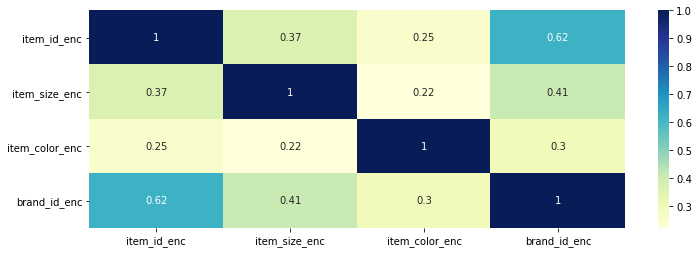

In [373]:
import seaborn as sns
sns.heatmap(df_train[['item_id_enc','item_size_enc','item_color_enc','brand_id_enc']].corr(),cmap="YlGnBu", annot=True)

In [374]:
df_train_bkp=df_train.copy()
df_test_bkp=df_test.copy()

In [375]:
df_train=df_train_bkp.copy()
df_test=df_test_bkp.copy()

In [140]:
# df_train=pd.concat([df_train[['Delivery_days','item_id_enc','item_size_enc','item_color_enc','brand_id_enc',
#                              'item_price','User_Age','return']],
#                               df_train_user_dummies,df_train_state_dummies,df_train_cust_dummies],axis=1)
# df_test=pd.concat([df_test[['order_item_id''Delivery_days','item_id_enc','item_size_enc','item_color_enc','brand_id_enc',
#                              'item_price','User_Age','return']],
#                               df_test_user_dummies,df_test_state_dummies,df_test_cust_dummies],axis=1)

In [376]:
df_train=df_train[['Delivery_days','item_id_enc','item_size_enc','item_color_enc','brand_id_enc',
                             'item_price','User_Age','return','user_state_enc','user_title_enc','Customer_Tenure']]
df_test=df_test[['order_item_id','Delivery_days','item_id_enc','item_size_enc','item_color_enc','brand_id_enc',
                             'item_price','User_Age','return','user_state_enc','user_title_enc','Customer_Tenure']]

In [377]:
df_train.head()

,Delivery_days,item_id_enc,item_size_enc,item_color_enc,brand_id_enc,item_price,User_Age,return,user_state_enc,user_title_enc,Customer_Tenure
0,5.0,0.235294,0.522085,0.368932,0.398649,49.9,47.000000,0.0,0.527033,0.508352,-1.0
1,5.0,0.418182,0.470209,0.531490,0.514104,19.9,46.000000,1.0,0.503849,0.508352,465.0
2,13.0,0.484848,0.470209,0.531490,0.468740,79.9,46.000000,0.0,0.503849,0.508352,465.0
3,3.0,0.698885,0.493287,0.536289,0.622444,19.9,56.000000,0.0,0.527033,0.508352,492.0
4,3.0,0.627451,0.555998,0.514710,0.591647,90.0,51.501745,1.0,0.498561,0.508352,135.0


In [378]:
df_test.head()

,order_item_id,Delivery_days,item_id_enc,item_size_enc,item_color_enc,brand_id_enc,item_price,User_Age,return,user_state_enc,user_title_enc,Customer_Tenure
79945,26,3.0,0.333333,0.496260,0.497696,0.489162,69.90,54.0,NaN,0.492882,0.508352,91.0
79946,28,9.0,0.469388,0.470209,0.475862,0.458054,19.90,54.0,NaN,0.492882,0.508352,91.0
79947,37,3.0,0.584821,0.522085,0.487022,0.548673,39.95,52.0,NaN,0.503849,0.508352,492.0
79950,80,3.0,0.323944,0.492143,0.470396,0.397278,24.90,46.0,NaN,0.507478,0.508352,214.0
79951,95,3.0,0.323944,0.496260,0.507723,0.397278,34.90,67.0,NaN,0.529160,0.508352,326.0


In [144]:
df_train_X=df_train.drop('return',axis=1)
df_train_Y=df_train['return']

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_val,Y_train,Y_val=train_test_split(df_train_X,df_train_Y,test_size=0.3,random_state=101)

In [147]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(50164, 28)
(50164,)
(21499, 28)
(21499,)


In [128]:
#DECISION TREE

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [149]:
dtree=DecisionTreeClassifier()

In [150]:
n_folds=5

In [151]:
param_grid={'max_depth': range(5,15,5),
           'criterion': ['entropy','gini']}

In [152]:
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)

In [153]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5)},
             verbose=1)

In [156]:
cv_results=pd.DataFrame(grid_search.cv_results_)

In [157]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.252280,0.053752,0.016194,0.008100,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.637895,0.631815,0.634406,0.628028,0.626894,0.631808,0.004056,1
1,0.425159,0.039539,0.011295,0.002308,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.628227,0.623642,0.623144,0.619854,0.618720,0.622717,0.003334,3
2,0.224857,0.016101,0.013806,0.003363,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.637197,0.631217,0.634406,0.628028,0.627093,0.631588,0.003806,2
3,0.396868,0.024477,0.012980,0.000880,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.621449,0.619755,0.622845,0.616864,0.610247,0.618232,0.004463,4


In [166]:
best_param_max_depth=grid_search.best_params_.get("max_depth")
best_param_criterion=grid_search.best_params_.get("criterion")

In [ ]:
#criterion: entropy
#max_depth: 5

In [170]:
dtree_best=DecisionTreeClassifier(max_depth=best_param_max_depth,criterion=best_param_criterion)
dtree_best.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
Y_pred=dtree_best.predict_proba()

In [172]:
from sklearn.metrics import roc_auc_score

In [173]:
Y_pred=dtree_best.predict_proba(X_val)[:,1]
roc_auc_score(Y_val,Y_pred)

0.6702318213796128

In [174]:
#RANDOM FOREST

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rf=RandomForestClassifier()

In [182]:
param_grid={"max_depth": range(5,15,5),
            "n_estimators": [100,200,300,400,500],
            "max_features": [5,10,15,20,25],
            "criterion": ["entropy","gini"]}

In [183]:
grid_search_rf= GridSearchCV(estimator=rf,param_grid=param_grid,cv=n_folds,verbose=1,scoring="roc_auc")

In [184]:
grid_search_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 254.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'max_features': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc', verbose=1)

In [185]:
cv_results_rf=pd.DataFrame(grid_search_rf.cv_results_)
cv_results_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.292910,0.131676,0.167140,0.005537,entropy,5,5,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.682658,0.678793,0.685636,0.669396,0.668317,0.676960,0.006972,95
1,6.461277,0.190989,0.333885,0.046683,entropy,5,5,200,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.683850,0.678582,0.684992,0.670488,0.668342,0.677251,0.006787,92
2,9.413540,0.057628,0.456435,0.008330,entropy,5,5,300,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.684206,0.676993,0.684358,0.669943,0.668062,0.676713,0.006861,97
3,12.246904,0.053706,0.592449,0.008673,entropy,5,5,400,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.683198,0.677849,0.684293,0.670003,0.667800,0.676629,0.006712,98
4,15.602071,0.089389,0.746025,0.013125,entropy,5,5,500,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.684296,0.677707,0.684919,0.670779,0.667595,0.677059,0.006980,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.694290,0.041676,0.241922,0.001701,gini,10,25,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.690035,0.685304,0.691104,0.676819,0.677910,0.684234,0.005949,70
96,35.132709,3.023341,0.493758,0.039465,gini,10,25,200,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.691189,0.685466,0.690685,0.677731,0.678157,0.684645,0.005829,50
97,51.212970,1.580567,0.722784,0.041189,gini,10,25,300,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.690774,0.685658,0.690926,0.677244,0.677777,0.684476,0.005997,57
98,41.686685,13.612231,0.542948,0.194347,gini,10,25,400,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.691471,0.685874,0.690766,0.677544,0.677905,0.684712,0.006023,44


In [191]:
best_param_max_depth_rf=grid_search_rf.best_params_.get("max_depth")
best_param_n_estimators_rf=grid_search_rf.best_params_.get("n_estimators")
best_param_max_features_rf=grid_search_rf.best_params_.get("max_features")
best_param_criterion_rf=grid_search_rf.best_params_.get("criterion")

In [195]:
best_param_n_estimators_rf

400

In [ ]:
#max_depth: 10
#n_estmators: 400
#max_featues: 10
#criterion: entropy

In [196]:
rf_best=RandomForestClassifier(max_depth=best_param_max_depth_rf,n_estimators=best_param_n_estimators_rf,
                              max_features=best_param_max_features_rf,criterion=best_param_criterion_rf)
rf_best.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=10,
                       n_estimators=400)

In [197]:
Y_pred_rf=rf_best.predict_proba(X_val)[:,1]
roc_auc_score(Y_val,Y_pred_rf)

0.6764268511677428

In [198]:
#LOGISTIC REGRESSION

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lr=LogisticRegression()

In [210]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, Y_train, scoring='roc_auc', cv=n_folds, n_jobs=-1)

In [211]:
scores

array([0.68966435, 0.68795443, 0.68968873, 0.67733043, 0.67703639])

In [213]:
sum(scores)/len(scores)

0.6843348654723348

In [214]:
#XG-BOOST

In [379]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [380]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [381]:
target = 'return'
#IDcol = 'item_id'

In [382]:
from sklearn import metrics

In [383]:
msk = np.random.rand(len(df_train)) < 0.8
train = df_train[msk]
val  = df_train[~msk]

In [384]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['return'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy_train : %.4g" % metrics.accuracy_score(dtrain['return'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['return'], dtrain_predprob))
    dval_predictions = alg.predict(val[predictors])
    dval_predprob = alg.predict_proba(val[predictors])[:,1]
    print ("Accuracy_val : %.4g" % metrics.accuracy_score(val['return'].values, dval_predictions))
    print ("AUC Score (val): %f" % metrics.roc_auc_score(val['return'], dval_predprob))
    print(alg.set_params(n_estimators=cvresult.shape[0]))
    
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')



Model Report
Accuracy_train : 0.7248
AUC Score (Train): 0.812624
Accuracy_val : 0.6291
AUC Score (val): 0.685252
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=51, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)


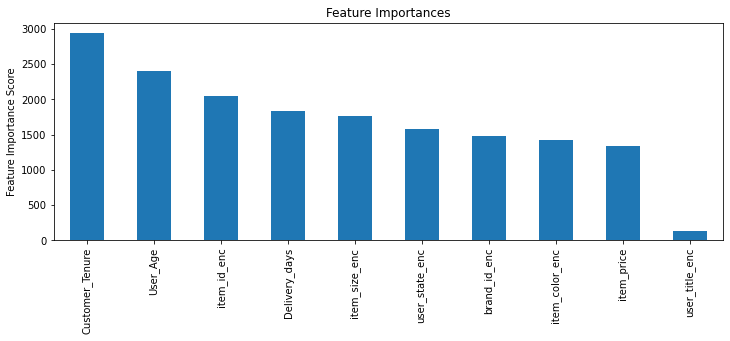

In [386]:
predictors = [x for x in train.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [249]:
#n_estimators=24

In [293]:
param_test1 = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=24,
 gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df_train[predictors],df_train[target])
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

[00:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=24, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_me

In [294]:
cv_results_xgb=pd.DataFrame(gsearch1.cv_results_)
cv_results_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.294731,0.058034,0.032924,0.006749,3,1,"{'max_depth': 3, 'min_child_weight': 1}",0.682146,0.686795,0.677974,0.682141,0.674344,0.680680,0.004223,11
1,1.168138,0.012653,0.031003,0.007742,3,3,"{'max_depth': 3, 'min_child_weight': 3}",0.682146,0.686795,0.677975,0.682141,0.674352,0.680682,0.004220,10
2,1.225713,0.059329,0.028580,0.004191,3,5,"{'max_depth': 3, 'min_child_weight': 5}",0.682146,0.686796,0.677975,0.682115,0.674188,0.680644,0.004267,12
3,1.850400,0.079021,0.028002,0.001903,5,1,"{'max_depth': 5, 'min_child_weight': 1}",0.683007,0.688021,0.678874,0.684939,0.675585,0.682085,0.004400,5
4,1.824980,0.029570,0.029318,0.002931,5,3,"{'max_depth': 5, 'min_child_weight': 3}",0.682935,0.688123,0.678734,0.685088,0.675417,0.682059,0.004514,6
5,1.819703,0.039363,0.027361,0.001857,5,5,"{'max_depth': 5, 'min_child_weight': 5}",0.683264,0.688267,0.678787,0.684912,0.675275,0.682101,0.004579,4
6,2.696427,0.030090,0.030377,0.000985,7,1,"{'max_depth': 7, 'min_child_weight': 1}",0.682616,0.689026,0.680129,0.685774,0.675211,0.682551,0.004734,1
7,2.770786,0.073406,0.034412,0.003006,7,3,"{'max_depth': 7, 'min_child_weight': 3}",0.683239,0.688632,0.678872,0.685625,0.675013,0.682276,0.004835,2
8,2.946135,0.037899,0.034987,0.003164,7,5,"{'max_depth': 7, 'min_child_weight': 5}",0.683084,0.688818,0.679515,0.685074,0.674581,0.682215,0.004860,3
9,4.310831,0.067026,0.033463,0.002379,9,1,"{'max_depth': 9, 'min_child_weight': 1}",0.681427,0.687646,0.677709,0.686895,0.673445,0.681424,0.005406,7


In [295]:
best_param_max_depth_xgb=gsearch1.best_params_.get("max_depth")
best_param_min_child_weight_xgb=gsearch1.best_params_.get("min_child_weight")

In [297]:
best_param_min_child_weight_xgb

1

In [260]:
#max_depth: 7 
#min_child_weight: 1

In [319]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=24,
 max_depth=7,
 min_child_weight=1,
 gamma=4,
 subsample=0.6,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)


Model Report
Accuracy_train : 0.6384
AUC Score (Train): 0.694493
Accuracy_val : 0.6314
AUC Score (val): 0.684711
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=24, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [306]:
param_test1 = {
 'gamma':range(0,5,1),
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=24, max_depth=7,
 min_child_weight=1,
 subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df_train[predictors],df_train[target])
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

[00:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=24, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [307]:
best_param_gamma_xgb=gsearch1.best_params_.get("gamma")

In [308]:
best_param_gamma_xgb

4

In [ ]:
#gamma: 4

In [314]:
param_test1 = {
  'subsample':[i/10.0 for i in range(6,10)],
  'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=24, max_depth=7,
 min_child_weight=1, gamma=4,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df_train[predictors],df_train[target])
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

[00:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=4,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=24, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27,
                                     subsample=None, tree_method

In [315]:
best_param_subsample_xgb=gsearch1.best_params_.get("subsample")
best_param_colsample_bytree_xgb=gsearch1.best_params_.get("colsample_bytree")

In [317]:
best_param_colsample_bytree_xgb

0.9

In [ ]:
#subsample: 0.6
#colsample_bytree: 0.9


Model Report
Accuracy_train : 0.6442
AUC Score (Train): 0.701949
Accuracy_val : 0.6313
AUC Score (val): 0.684221
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=14, n_jobs=8, num_parallel_tree=1, random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


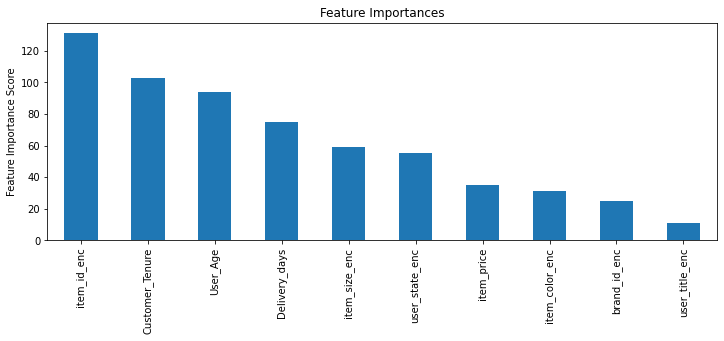

In [402]:
xgb1 = XGBClassifier(
#  learning_rate =0.001,
#  n_estimators=51,
#  max_depth=7,
#  min_child_weight=2,
#  gamma=4,
#  subsample=0.6,
#  colsample_bytree=0.9,
# #  objective= 'binary:logistic',
#  nthread=-1,
# #  scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)